<a href="https://colab.research.google.com/github/FANG87003/2025_ML_hws/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 113-2 深度學習 作業 3

## 載入套件

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import InputLayer

## 一、資料預處理

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# 顯示資料形狀
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)

x_train: (60000, 28, 28)
x_test: (10000, 28, 28)


### 正規化 & reshape

In [5]:
x_train_normalize = x_train.reshape(60000, 784).astype('float32') / 255
x_test_normalize = x_test.reshape(10000, 784).astype('float32') / 255

### One-hot encoding

In [6]:
y_train_oh = to_categorical(y_train, 10)
y_test_oh = to_categorical(y_test, 10)

### 顯示三張訓練圖片與真實標籤

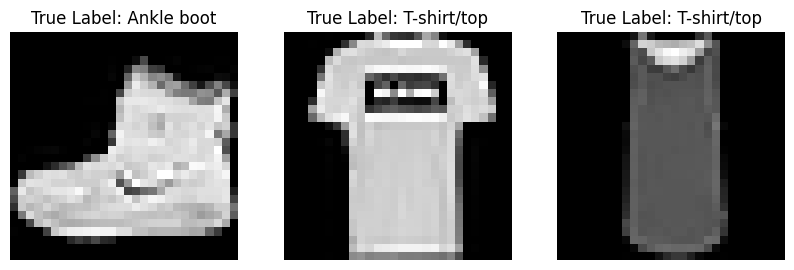

In [7]:
labels = ["T-shirt/top", "Trouser", "Pullover",
      "Dress", "Coat", "Sandal",
      "Shirt", "Sneaker", "Bag",
      "Ankle boot"]


plt.figure(figsize=(10, 4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"True Label: {labels[y_train[i]]}")
    plt.axis('off')
plt.show()

## 二、建立神經網路模型

In [8]:
model = Sequential()

### 輸入層

In [9]:
model.add(InputLayer(shape=(784,)))
model.add(Dropout(0.2))

### 第一隱藏層

In [10]:
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(0.4))

### 第二隱藏層

In [11]:
model.add(Dense(256, kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(0.2))

### 第三隱藏層

In [12]:
model.add(Dense(128, kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(0.2))

### 輸出層

In [13]:
model.add(Dense(units=10, kernel_initializer='he_normal', activation='softmax'))

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

## 三、訓練神經網路模型

In [15]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(0.000239),
    #optimizer='adam',
    metrics=['accuracy'])

In [16]:
train_history = model.fit(
    x_train_normalize, y_train_oh,
    validation_split=0.2,
    epochs=200,
    batch_size=256,
    verbose=2)

Epoch 1/200
188/188 - 9s - 50ms/step - accuracy: 0.6168 - loss: 1.0661 - val_accuracy: 0.7834 - val_loss: 0.5872
Epoch 2/200
188/188 - 1s - 3ms/step - accuracy: 0.7624 - loss: 0.6562 - val_accuracy: 0.8175 - val_loss: 0.4967
Epoch 3/200
188/188 - 1s - 3ms/step - accuracy: 0.7949 - loss: 0.5748 - val_accuracy: 0.8326 - val_loss: 0.4584
Epoch 4/200
188/188 - 1s - 4ms/step - accuracy: 0.8090 - loss: 0.5306 - val_accuracy: 0.8429 - val_loss: 0.4352
Epoch 5/200
188/188 - 1s - 5ms/step - accuracy: 0.8181 - loss: 0.5004 - val_accuracy: 0.8472 - val_loss: 0.4152
Epoch 6/200
188/188 - 1s - 5ms/step - accuracy: 0.8283 - loss: 0.4765 - val_accuracy: 0.8534 - val_loss: 0.3990
Epoch 7/200
188/188 - 1s - 5ms/step - accuracy: 0.8321 - loss: 0.4611 - val_accuracy: 0.8591 - val_loss: 0.3879
Epoch 8/200
188/188 - 1s - 4ms/step - accuracy: 0.8378 - loss: 0.4451 - val_accuracy: 0.8668 - val_loss: 0.3706
Epoch 9/200
188/188 - 1s - 4ms/step - accuracy: 0.8411 - loss: 0.4338 - val_accuracy: 0.8662 - val_loss

## 四、顯示 loss & accuracy 折線圖

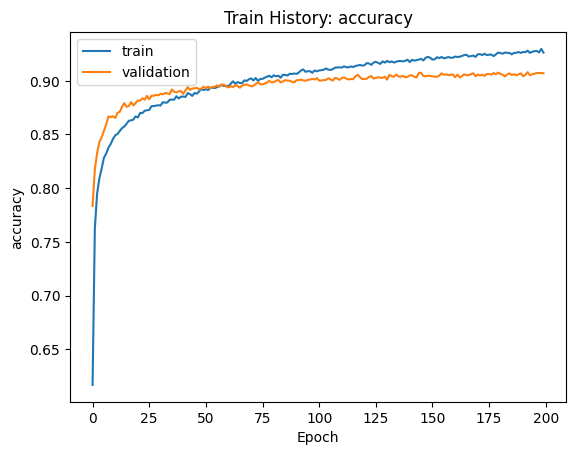

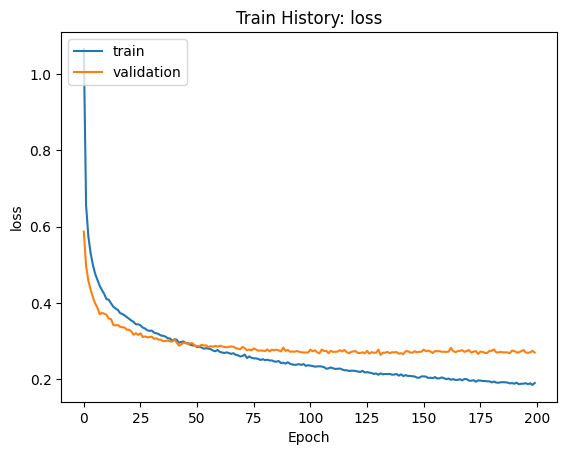

In [17]:
def show_train_history(train_history, train, validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title(f'Train History: {train}')
  plt.ylabel(train)
  plt.xlabel('Epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

## 五、評估模型準確率

In [18]:
scores = model.evaluate(x_test_normalize, y_test_oh)
print(f"accuracy = {scores[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9015 - loss: 0.2922
accuracy = 0.90420001745224


## 六、預測

In [19]:
predictions = model.predict(x_test_normalize)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [20]:
predicted_classes = np.argmax(predictions, axis=1)

In [21]:
predicted_classes

array([9, 2, 1, ..., 8, 1, 5])

## 七、顯示圖片與標籤名稱

In [22]:
import matplotlib.pyplot as plt

def plot_images_labels_prediction(images, true_labels, pred_labels, label_names, idx=0, num=10):
  plt.figure(figsize=(6, 7))
  if num > 25: num = 25
  for i in range(num):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[idx + i], cmap='gray')

    true_name = label_names[true_labels[idx + i]]
    pred_name = label_names[pred_labels[idx + i]]

    plt.title(f'True: {true_name}\nPred: {pred_name}', fontsize=10)
    plt.axis('off')

  plt.tight_layout()
  plt.show()

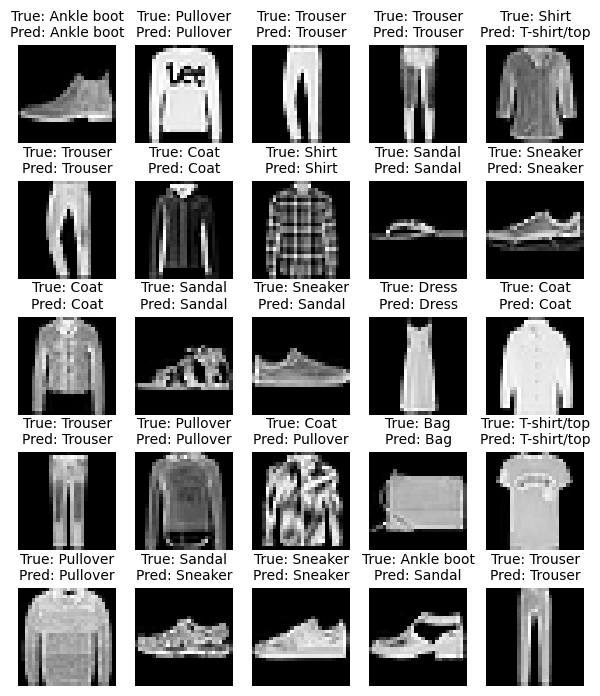

In [23]:
plot_images_labels_prediction(x_test, y_test, predicted_classes, labels, idx=0, num=25)

## 八、混淆矩陣 (Confusion Matrix)

In [24]:
import pandas as pd

pd.crosstab(y_test, predicted_classes, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,875,1,16,12,2,0,87,0,7,0
1,2,980,1,13,1,0,2,0,1,0
2,13,0,844,8,72,0,62,0,1,0
3,22,3,9,917,28,0,16,0,5,0
4,1,0,89,30,832,0,47,0,1,0
5,0,0,0,0,0,958,0,25,1,16
6,120,0,78,28,56,0,711,0,7,0
7,0,0,0,0,0,4,0,979,0,17
8,2,0,2,5,3,1,4,4,979,0


## 九、儲存完整模型

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [27]:
model.save('fashion_mnist_model.keras')